In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from collections import Counter
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [2]:
df = pd.read_csv('Heart_disease_dataset.csv')

In [3]:
X = df.drop('Result', axis=1).values.astype(np.float32)
y = df['Result'].values

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, sampling_strategy='auto') 
X, y = smote.fit_resample(X, y)
pd.Series(y).value_counts()


0    715
1    715
Name: count, dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
class_counts = Counter(y_train)
total_samples = len(y_train)
class_weight_a = {
    0: (1 / class_counts[0]) * (total_samples / 2.0),
    1: (1 / class_counts[1]) * (total_samples / 2.0)
}

In [7]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu', kernel_initializer='uniform'),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_initializer='uniform'),
    Dense(16, activation='relu', kernel_initializer='uniform'),
    Dropout(0.2),
    Dense(8, activation='relu', kernel_initializer='uniform'),
    Dropout(0.2),
    Dense(1, activation='sigmoid', kernel_initializer='uniform')
])

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,233 (4.82 KB)

 Trainable params: 1,233 (4.82 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)
lr_reducer = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

In [10]:
model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    class_weight=class_weight_a,
    callbacks=[early_stopping, lr_reducer],
    verbose=1
)

Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.4803 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5232 - loss: 0.6926 - val_accuracy: 0.4803 - val_loss: 0.6760 - learning_rate: 0.0010
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5732 - loss: 0.6454 - val_accuracy: 0.8341 - val_loss: 0.5198 - learning_rate: 0.0010
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8047 - loss: 0.5134 - val_accuracy: 0.8384 - val_loss: 0.4621 - learning_rate: 0.0010
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8244 - loss: 0.4685 - val_accuracy: 0.8865 - val_loss: 0.3954 - learning_rate: 0.0010
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8626 - loss: 0.3958 - val_accuracy: 0.8646 - val_loss: 0.3550 - learning_rate: 0.0010
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8331 - loss: 0.3827 - val_ac

In [11]:
test_results = model.evaluate(X_test, y_test, verbose=1, return_dict=True)
print("\nTest results:")
for metric, value in test_results.items():
    print(f"{metric}: {value:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9627 - loss: 0.0891 

Test results:
accuracy: 0.9650
loss: 0.0849


In [12]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(np.int32).flatten()

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("\nTest results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Test results:
Accuracy: 0.9650
F1-Score: 0.9643
Recall: 0.9441
Precision: 0.9854


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


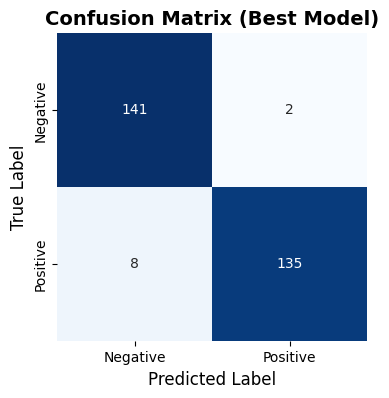

In [13]:
predictions=model.predict(X_test)
y_pred = (predictions > 0.5).astype(int) 
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix (Best Model)', fontsize=14, weight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()